<a href="https://colab.research.google.com/github/kireeti-ai/AirQualityPrediction/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import requests
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
import kagglehub
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12


In [27]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [28]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [29]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

,0
Xylene,61.322001
PM10,37.723071
NH3,34.973418
Toluene,27.229014
Benzene,19.041008
AQI,15.851139
AQI_Bucket,15.851139
PM2.5,15.570079
NOx,14.171549
O3,13.619586


In [30]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

# Feature Enginnering

In [33]:
# identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, Air_quality]
Index: []


In [34]:
# count the number of duplicates
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [35]:
# For calculating the AQI we will replace all the NaN values of columns PM2.5, PM10, NO, NO2, NOx,
# NH3, CO, SO2, O3, Benzene, Toluene, Xylene with the mean values

# Select only numeric columns for filling NaN values
numeric_cols = df.select_dtypes(include=np.number).columns

# Fill NaN values in numeric columns with their mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


## We cannot fill null values of AQI with mean or mode nor we can delete it, So, we will calculate AQI from all 7 measures:
The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
> For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

> For CO and O3 the maximum value in last 8-hrs is used.

> Each measure is converted into a Sub-Index based on pre-defined groups.

> Sometimes measures are not available due to lack of measuring or lack of required data points.

> Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

## calculating Sub-Index

In [36]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))

# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if pd.isna(x):
        return np.nan
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].apply(lambda x: get_O3_subindex(x))

In [37]:
if pd.isna(df["AQI"]).any():
        df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,Air_quality,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,0.000000,166.463581,NaN,112.084735,124.835260,34.5500,21.4375,5.870869,46.000000,149.058824
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,3.770000,166.463581,NaN,112.084735,124.835260,30.6875,20.5750,5.870869,48.500000,34.060000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,2.250000,166.463581,NaN,112.084735,124.835260,36.3375,37.1250,5.870869,302.352941,30.700000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,1.000000,166.463581,NaN,112.084735,124.835260,23.2375,22.4625,5.870869,85.000000,36.080000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,2.780000,166.463581,NaN,112.084735,124.835260,49.1625,47.2000,5.870869,330.000000,39.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.000000,Good,50.940000,25.033333,10.6875,24.4250,3.117500,23.500000,23.300000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.000000,Satisfactory,74.090000,40.633333,15.9000,20.6625,2.997500,26.000000,30.140000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.000000,Satisfactory,65.730000,38.183333,10.5250,22.9125,2.677500,24.000000,30.960000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.000000,Satisfactory,49.970000,27.733333,12.3000,23.5000,2.507500,26.000000,28.300000


In [38]:
if pd.isna(df["Air_quality"]).any():
        def get_Air_quality(x):
            if x <= 50:
                return "Good"
            elif x > 50 and x <= 100:
                return "Satisfactory"
            elif x > 100 and x <= 200:
                return "Moderate"
            elif x > 200 and x <= 300:
                return "Poor"
            elif x > 300 and x <= 400:
                return "Very Poor"
            elif x > 400:
                return "Severe"
            else:
                return '0'

        df["Air_quality"] = df["Air_quality"].fillna(df["AQI"].apply(lambda x: get_Air_quality(x)))

df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,Air_quality,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,0.000000,166.463581,Moderate,112.084735,124.835260,34.5500,21.4375,5.870869,46.000000,149.058824
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,3.770000,166.463581,Moderate,112.084735,124.835260,30.6875,20.5750,5.870869,48.500000,34.060000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,2.250000,166.463581,Moderate,112.084735,124.835260,36.3375,37.1250,5.870869,302.352941,30.700000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,1.000000,166.463581,Moderate,112.084735,124.835260,23.2375,22.4625,5.870869,85.000000,36.080000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,2.780000,166.463581,Moderate,112.084735,124.835260,49.1625,47.2000,5.870869,330.000000,39.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.000000,Good,50.940000,25.033333,10.6875,24.4250,3.117500,23.500000,23.300000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.000000,Satisfactory,74.090000,40.633333,15.9000,20.6625,2.997500,26.000000,30.140000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.000000,Satisfactory,65.730000,38.183333,10.5250,22.9125,2.677500,24.000000,30.960000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.000000,Satisfactory,49.970000,27.733333,12.3000,23.5000,2.507500,26.000000,28.300000


In [39]:

df = df.drop(columns=["PM10_SubIndex", "PM2.5_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


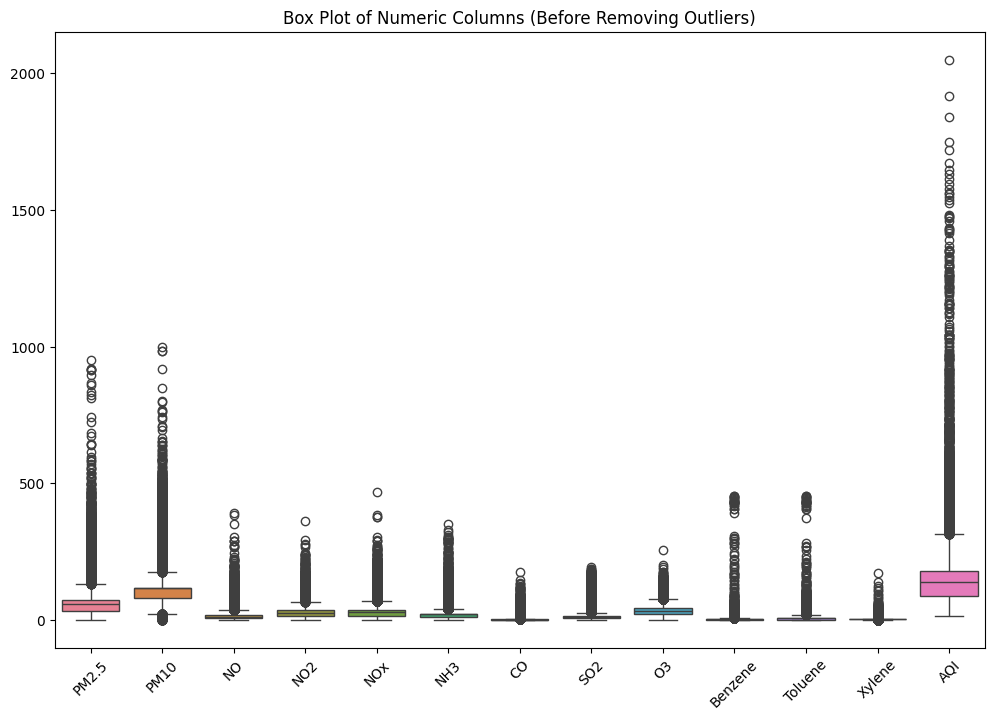

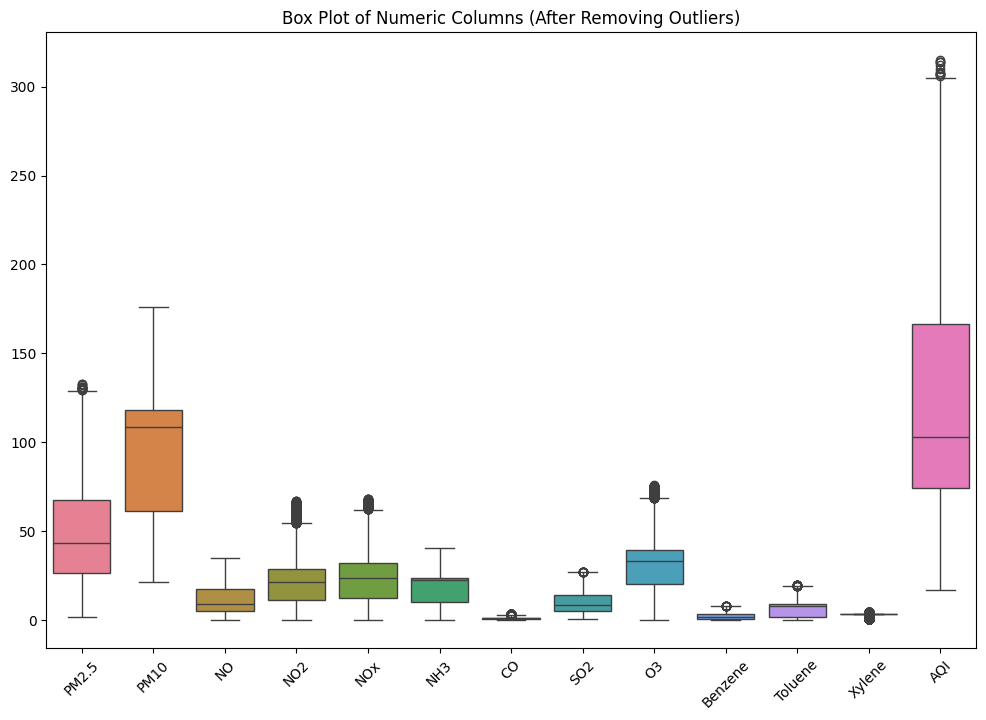

In [40]:
# Select numeric columns for outlier visualization
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Create a box plot for each numeric column before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.show()

# Remove outliers from the dataset
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot for each numeric column after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.show()


# Exploratory Data Analysis


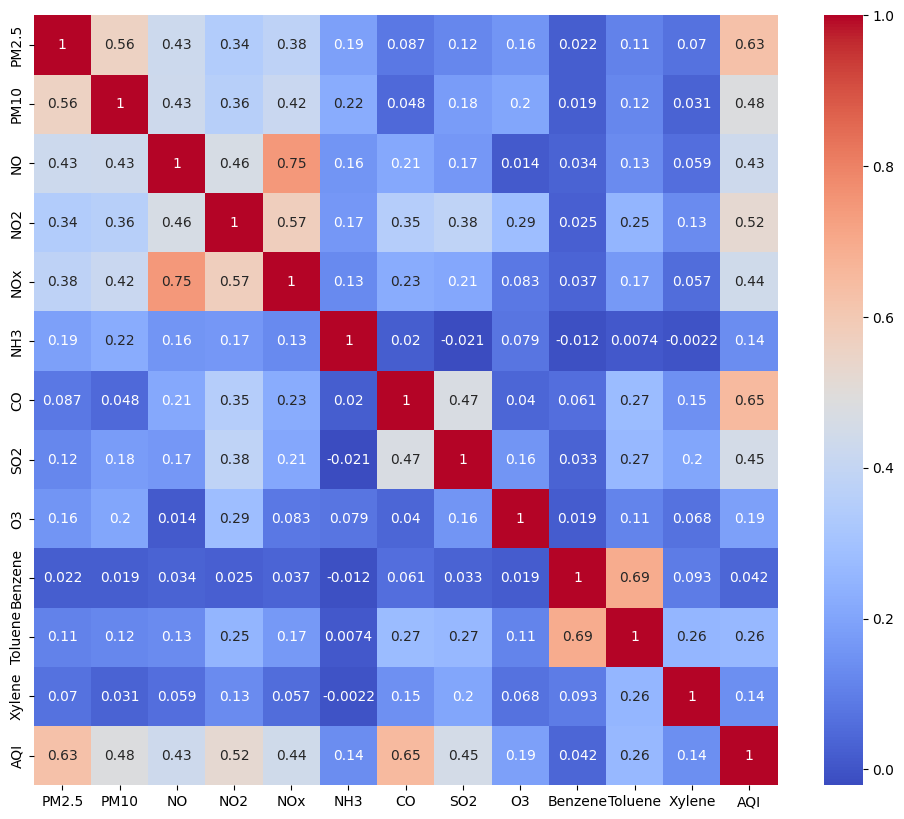

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),cmap='coolwarm',annot=True);

In [42]:
#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

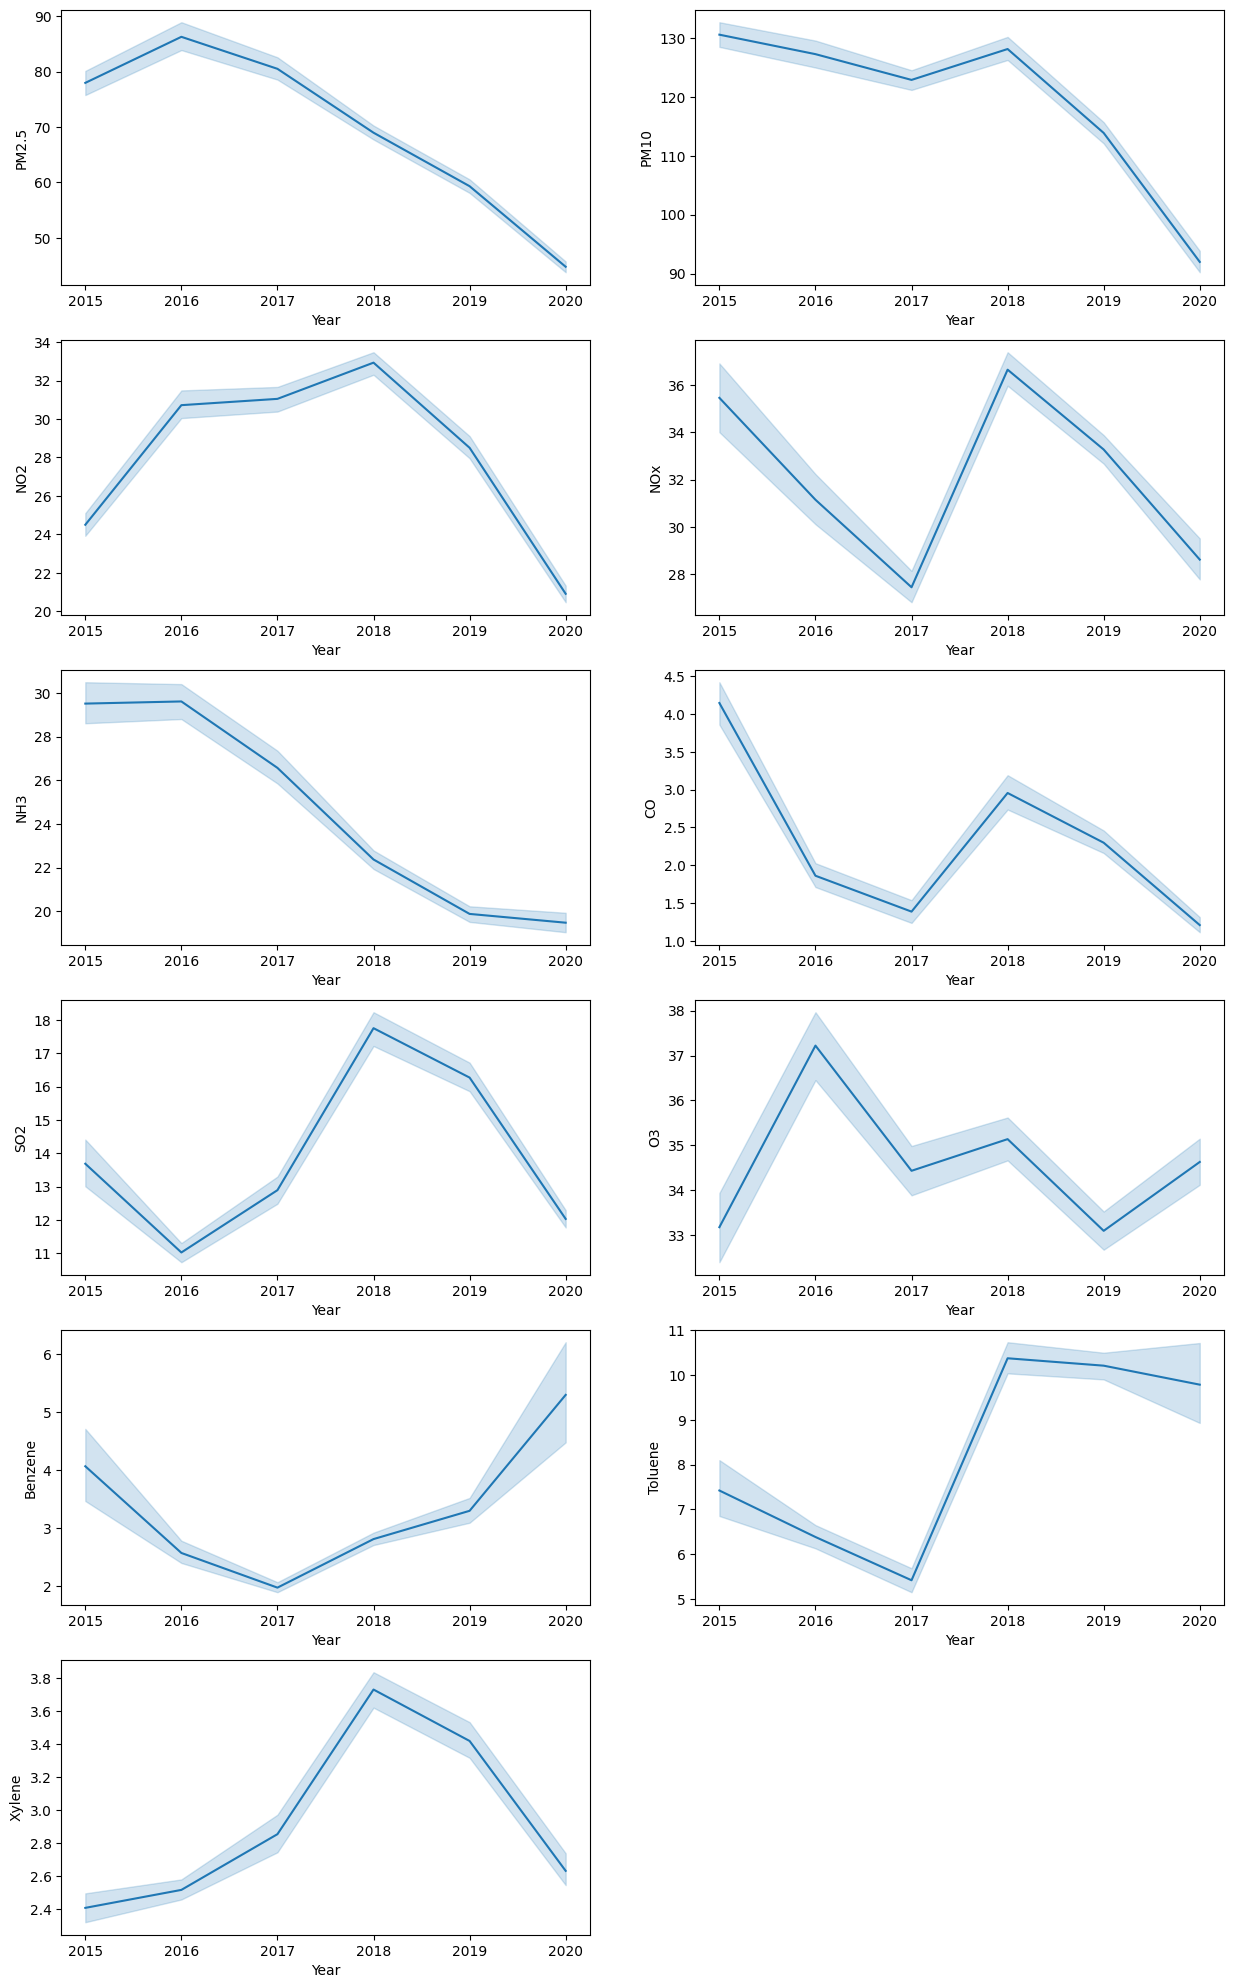

In [43]:
#line plot analysis for amount of particulate matter and gases  over the years
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(15,25))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

### Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [44]:
df2 = df.copy()
df2['Vehicular_Pollution_content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial_Pollution_content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2 = df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          29531 non-null  object        
 1   Date                          29531 non-null  datetime64[ns]
 2   AQI                           29531 non-null  float64       
 3   Air_quality                   29531 non-null  object        
 4   Month                         29531 non-null  object        
 5   Year                          29531 non-null  object        
 6   Vehicular_Pollution_content   29531 non-null  float64       
 7   Industrial_Pollution_content  29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.8+ MB


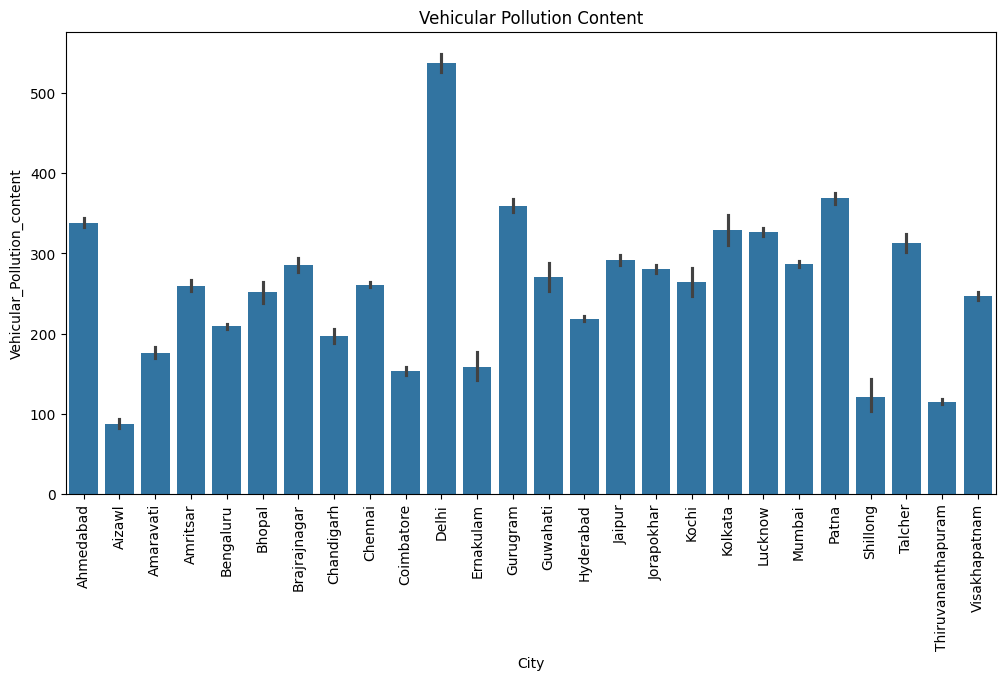

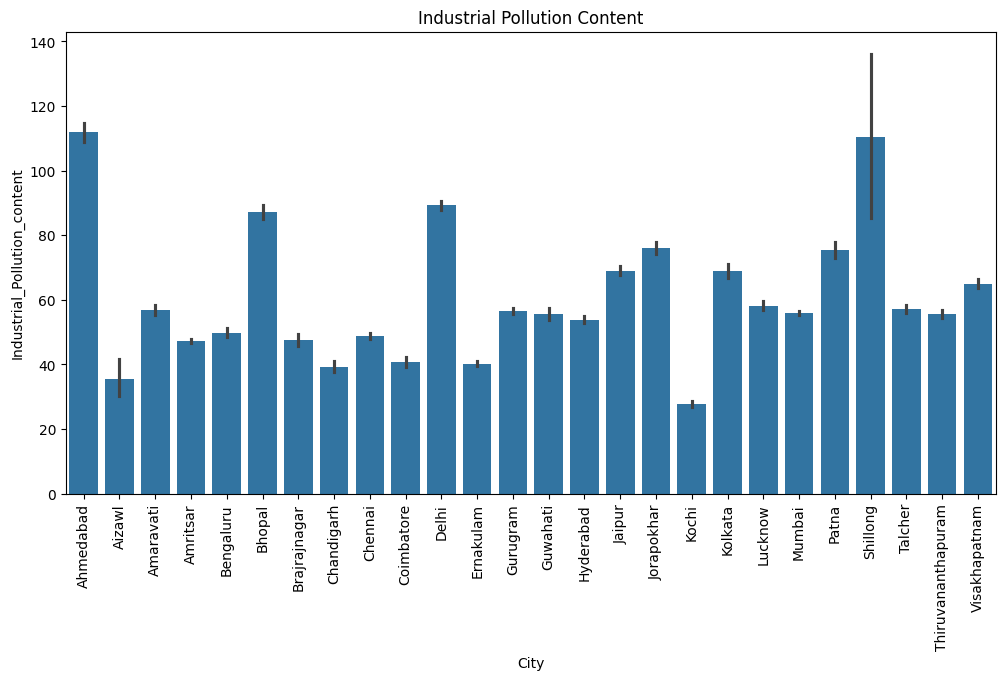

In [45]:
# Using seaborn barplot instead of iplot
plt.figure(figsize=(12, 6))
sns.barplot(x=df2['City'], y=df2['Vehicular_Pollution_content'])
plt.title('Vehicular Pollution Content')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df2['City'], y=df2['Industrial_Pollution_content'])
plt.title('Industrial Pollution Content')
plt.xticks(rotation=90)
plt.show()

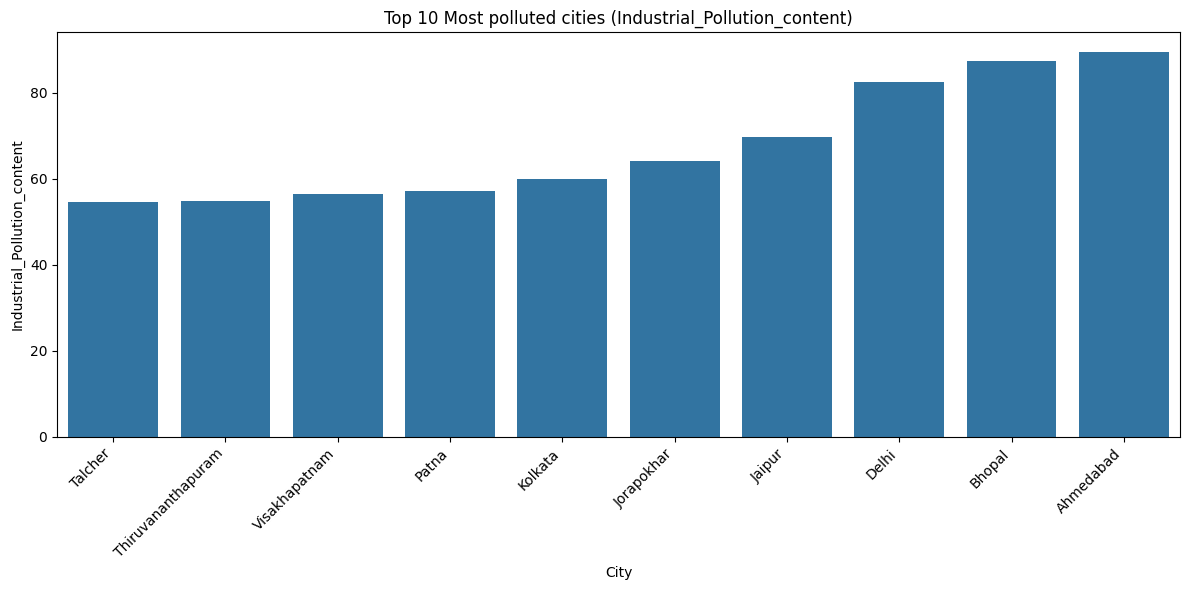

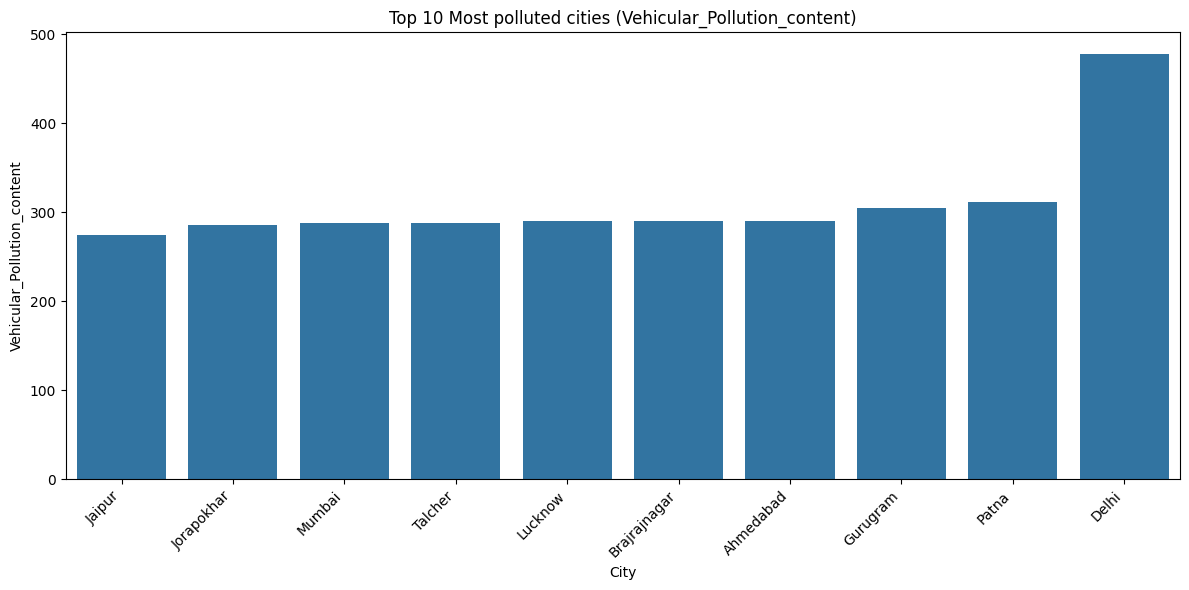

In [46]:
def max_bar_plot(var):
    x1 = df2[['City',var]].groupby(["City"]).median().sort_values(by = var, ascending = True).tail(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x1.index, y=x1[var])
    plt.title(f'Top 10 Most polluted cities ({var})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

max_bar_plot('Industrial_Pollution_content')
max_bar_plot('Vehicular_Pollution_content')

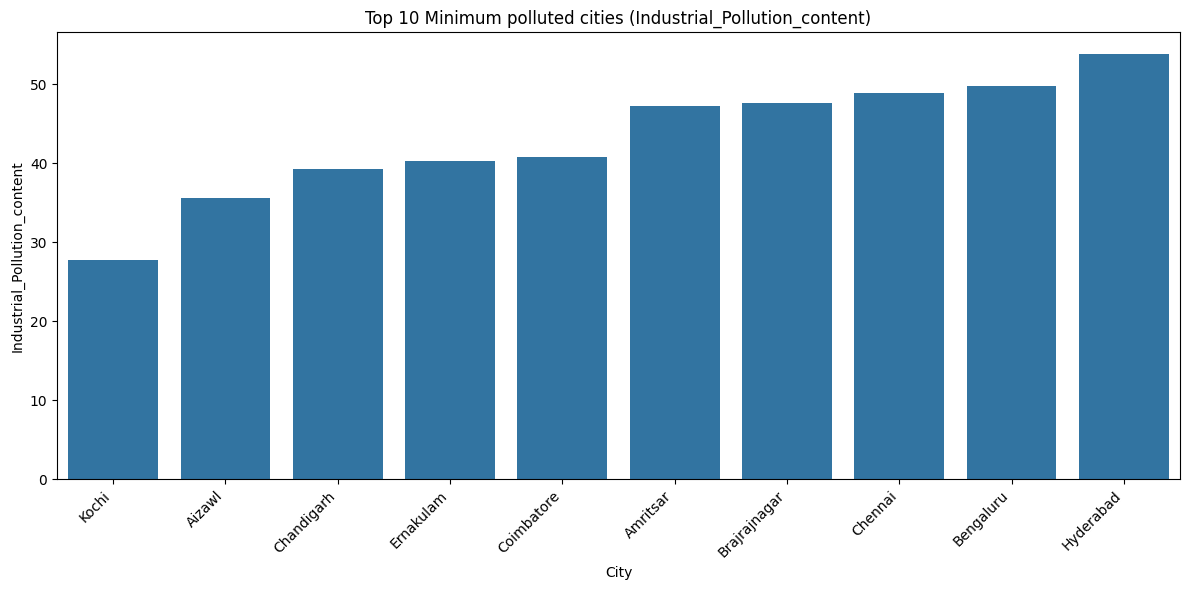

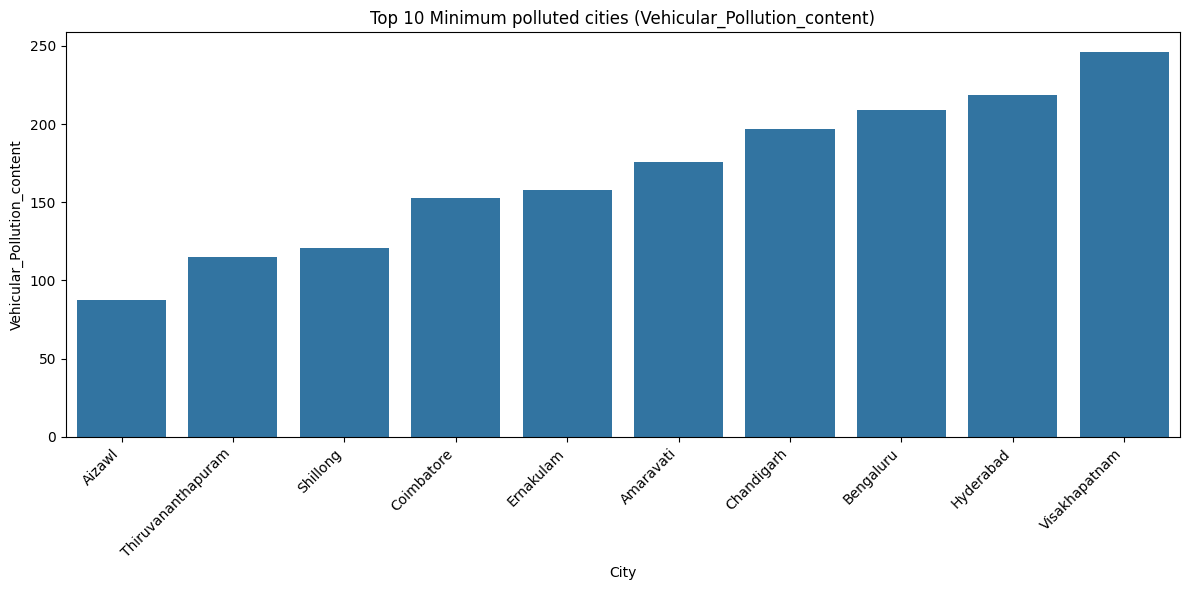

In [47]:
def min_bar_plot(var):
    x1 = df2[['City',var]].groupby(["City"]).mean().sort_values(by = var, ascending = True).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x1.index, y=x1[var])
    plt.title(f'Top 10 Minimum polluted cities ({var})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

min_bar_plot('Industrial_Pollution_content')
min_bar_plot('Vehicular_Pollution_content')

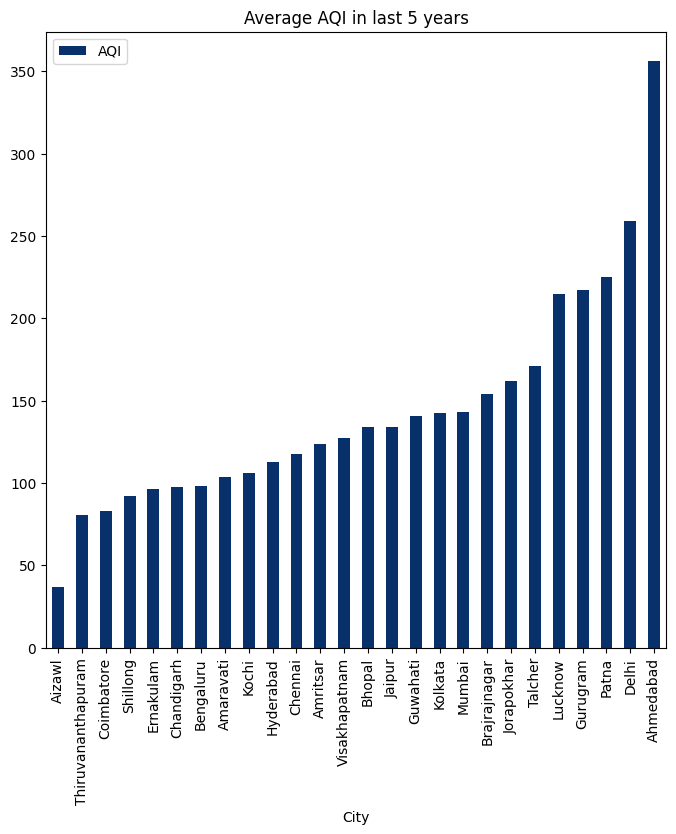

In [48]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

    ### From above heatmap we observe a strong correlation of NO with NOx and of Benzene with Toluene so lets visualize them with the help of scatterplots¶


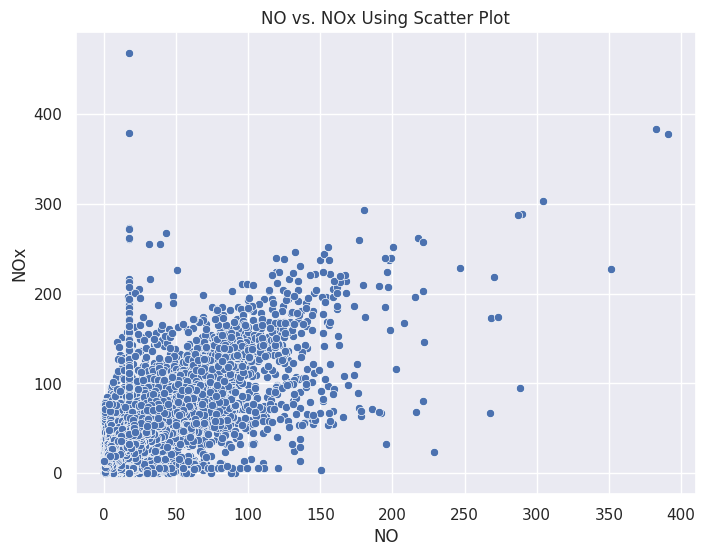

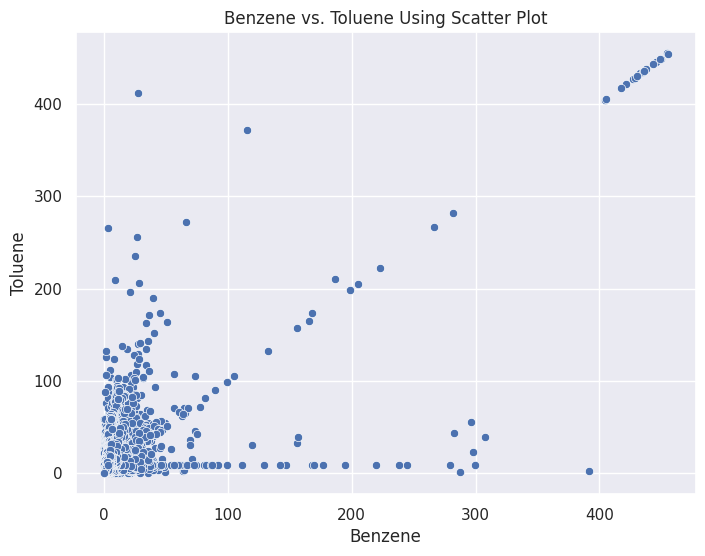

In [49]:
sns.set(rc={'figure.figsize': (8, 6)})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO', y='NOx', data=df)
plt.title('NO vs. NOx Using Scatter Plot')
plt.show()

sns.scatterplot(x='Benzene', y='Toluene', data=df)
plt.title('Benzene vs. Toluene Using Scatter Plot')
plt.show()

    # MODEL TRAINING

In [50]:
df = df.drop(columns = ['Date', 'Month', 'Year', 'City'], axis=1)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


## Train-Test Split:

In [51]:
y = df["AQI"]
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(22148, 8) (7383, 8) (22148,) (7383,)


# Supervised Learning:

In [52]:
# Importing all Models.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Linear Regression:

In [53]:
# Linear Regression Model
mreg = LinearRegression()
mreg.fit(x_train,y_train)
mlr_y_predict = mreg.predict(x_test)

# 2. Polynomial Regression:

In [54]:
# Polynomial Regression Model:
# Degree = 2

poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

# 3. Decision Tree:

In [55]:
# Decision Tree Tegression Model:

dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)
dt_y_predict = dec_tree.predict(x_test)

# 4. Random Forest:

In [56]:
# Random Forest Regression Model
# Random Forest with 500 trees

rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)
rt_y_predict = rt_reg.predict(x_test)

# Model Evaluation: (Supervised Learning)

In [57]:

# Multiple Linear Regresion
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)

#Polynomial Regression
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)

#Decision Tree Regression
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)

# Random Forest Regression
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)


# Training Data Prediction

#multiple linear regresion
mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))

#polynomial regression
pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))

#decision tree regression
dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))

# random forest regression
rf_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, rt_reg.predict(x_train)))
rf_ytp_mae = metrics.mean_absolute_error(y_train, rt_reg.predict(x_train))
rf_ytp_r2 = metrics.r2_score(y_train, rt_reg.predict(x_train))


# RESULT

print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r2,rf_ytp_rmse,rf_ytp_mae))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_mlr,rmse_mlr,mae_mlr))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(r2_pr,rmse_pr,mae_pr))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_dt,rmse_dt,mae_dt))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_rt,rmse_rt,mae_rt))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.7935	58.6094	32.0285
Polynomial Regression    	0.85	50.23	28.248
Decision Tree Regression 	0.9992	3.6546	0.2644
Random Forest Regression 	0.9815	17.5503	8.0390


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.7917	59.0279	32.5566
Polynomial Regression    	0.83	53.26	29.159
Decision Tree Regression 	0.7615	63.1604	29.8127
Random Forest Regression 	0.8729	46.1016	21.3098


#### Based on the provided evaluation metrics for air quality prediction, the model with the highest R-squared (R^2) score and lowest Root Mean Squared Error (RMSE) on the testing data is often considered the best choice. In this case, the Random Forest Regression model outperforms the other models based on these metrics.

# Predictions of all above Supervised models:

In [58]:

sample_input = pd.DataFrame([[26, 50, 1, 19, 23, 1, 3, 42]],
                            columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3'])

mlr_prediction = mreg.predict(sample_input)
pr_prediction = preg.predict(poly_reg.transform(sample_input))
dt_prediction = dec_tree.predict(sample_input)
rt_prediction = rt_reg.predict(sample_input)

aqi_quality_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

def get_aqi_quality(aqi):
    if aqi <= 50:
        return aqi_quality_labels[0]
    elif aqi <= 100:
        return aqi_quality_labels[1]
    elif aqi <= 200:
        return aqi_quality_labels[2]
    elif aqi <= 300:
        return aqi_quality_labels[3]
    else:
        return aqi_quality_labels[4]


mlr_aqi_quality = get_aqi_quality(mlr_prediction)
pr_aqi_quality = get_aqi_quality(pr_prediction)
dt_aqi_quality = get_aqi_quality(dt_prediction)
rt_aqi_quality = get_aqi_quality(rt_prediction)


print("Multiple Linear Regression Prediction:")
print("AQI:", mlr_prediction)
print("AQI Quality:", mlr_aqi_quality)
print()
print("Polynomial Regression Prediction:")
print("AQI:", pr_prediction)
print("AQI Quality:", pr_aqi_quality)
print()
print("Decision Tree Regression Prediction:")
print("AQI:", dt_prediction)
print("AQI Quality:", dt_aqi_quality)
print()
print("Random Forest Regression Prediction:")
print("AQI:", rt_prediction)
print("AQI Quality:", rt_aqi_quality)


Multiple Linear Regression Prediction:
AQI: [83.20192011]
AQI Quality: Satisfactory

Polynomial Regression Prediction:
AQI: [75.61815685]
AQI Quality: Satisfactory

Decision Tree Regression Prediction:
AQI: [80.]
AQI Quality: Satisfactory

Random Forest Regression Prediction:
AQI: [76.70156298]
AQI Quality: Satisfactory


# Unsupervised Learning:

In [59]:
# Importing all Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. K-Means Clustering:

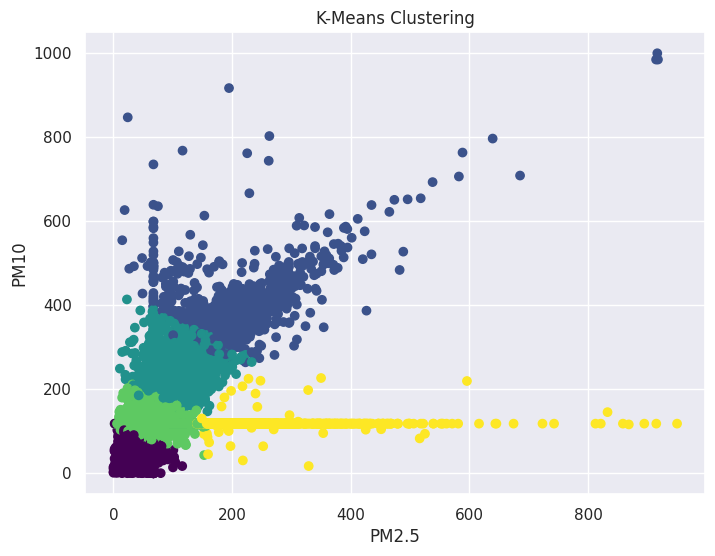

In [60]:
# Drop AQI and Air_quality columns as they are not used for clustering
X = df.drop(columns=['AQI', 'Air_quality'])

# Perform K-Means clustering with k=3 (you can change the number of clusters as needed)
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (assuming PM2.5 and PM10 are plotted on a scatter plot)
plt.scatter(df['PM2.5'], df['PM10'], c=df['cluster'], cmap='viridis')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('K-Means Clustering')
plt.show()

# 2. Principal Component Analysis:

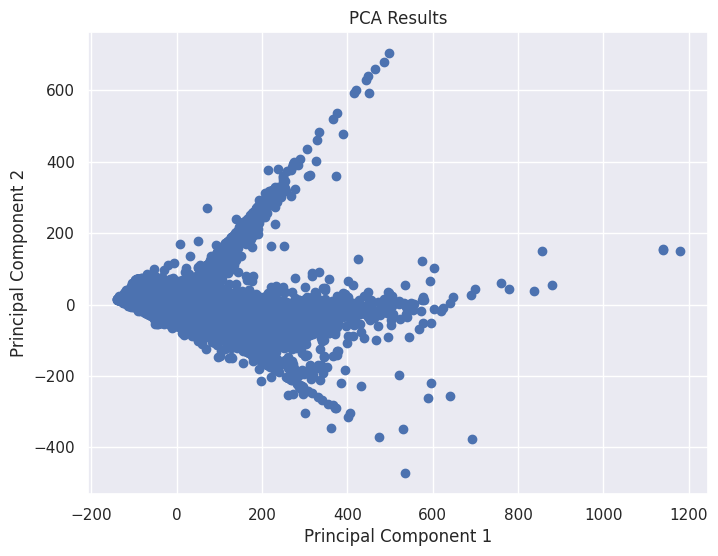

In [61]:
Y = df.drop(columns=['AQI', 'Air_quality'])

# 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Y)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

# Cross Validation and Fine Tuning:

In [62]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
}
# Initialize GridSearchCV with the Random Forest model and hyperparameters grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Perform
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

## Hence, Random Forest is the best model with highest Accuracy. So, we will use Random Forest as the Regression Model.

# Random Forest:

In [66]:
# Training the model:
Best_Model_RF = RandomForestRegressor(n_estimators = 500, random_state = 0)
Best_Model_RF.fit(x_train,y_train)
Best_Model_RF_predict = Best_Model_RF.predict(x_test)
# Model Evaluation:
# Error Estimation Methods
# Test Data prediction
rmse_r = sqrt(metrics.mean_squared_error(y_test, Best_Model_RF_predict))
mae_r = metrics.mean_absolute_error(y_test, Best_Model_RF_predict)
r2_r = metrics.r2_score(y_test,Best_Model_RF_predict)
# Train
#random forest regression
rf_ytp_rms = sqrt(metrics.mean_squared_error(y_train, Best_Model_RF.predict(x_train)))
rf_ytp_ma = metrics.mean_absolute_error(y_train, Best_Model_RF.predict(x_train))
rf_ytp_r = metrics.r2_score(y_train, Best_Model_RF.predict(x_train))
# RESULT
print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r,rf_ytp_rms,rf_ytp_ma))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_r,rmse_r,mae_r))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Random Forest Regression 	0.9815	17.5503	8.0390


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Random Forest Regression 	0.8729	46.1016	21.3098


# Model Deployment:

In [67]:
y = df["AQI"]
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(22148, 8) (7383, 8) (22148,) (7383,)


In [68]:
import joblib

joblib.dump(Best_Model_RF, 'aqi_model_8_features.pkl')
print("Model saved as 'aqi_model_8_features.pkl'")

Model saved as 'aqi_model_8_features.pkl'
